In [694]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


In [695]:
# Dropping the columns that will not add any value to the model output. While these columns might be useful 

pd.set_option('display.max_columns', None)
df = pd.read_csv(r'C:\Users\Vipul\CreditLine-Decision-Engine-Using-Amazon-Sagemaker\credit.csv')


In [696]:
df.head(4)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"


### Dropping the columns

WE will first drop the columns that we will not need for the model. We may need it if we need to analyse for some business queries, but certainly we dont need them for model building.

In [697]:
#checking if we need to drop total_acc & open_acc

a = df[df['loan_status']=='Fully Paid']
a.head(4)

a['diff']=a['total_acc']-a['open_acc']
a.head(4)
a['diff'].mean()

14.279733129788257

In [698]:
a = df[df['loan_status']!='Fully Paid']
a.head(4)

a['diff']=a['total_acc']-a['open_acc']
a.head(4)
a['diff'].mean()

13.381638407168515

We need to drop both these column as these is no information that will help the model.

In [699]:
df['grade'].value_counts()

grade
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: count, dtype: int64

In [700]:
a = df[df['loan_status']!='Fully Paid']
a['sub_grade'].value_counts()

sub_grade
C4    4773
C3    4635
C5    4471
C2    4460
D1    4219
C1    4110
D2    3911
D4    3629
B4    3543
D3    3474
B5    3424
B3    3288
D5    3105
E2    2730
E1    2724
B2    2441
E3    2361
E4    2107
B1    1891
E5    1843
A5    1573
F1    1370
F2    1175
A4    1109
F3     997
F4     815
F5     680
A3     614
G1     488
A2     461
G2     364
G3     282
A1     279
G4     168
G5     159
Name: count, dtype: int64

We will drop this sub_grade column as well. For eg. I was hoping that values with grade with B5 and D5 would have a lot of difference but that is not the case. We will drop it.

In [701]:


df.drop(['issue_d','purpose','title','earliest_cr_line','initial_list_status','int_rate','application_type','total_acc','emp_title','open_acc','emp_length','sub_grade'],axis=1,inplace = True)

In [702]:
df.head(5)

,loan_amnt,term,installment,grade,home_ownership,annual_inc,verification_status,loan_status,dti,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,329.48,B,RENT,117000.0,Not Verified,Fully Paid,26.24,0.0,36369.0,41.8,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,265.68,B,MORTGAGE,65000.0,Not Verified,Fully Paid,22.05,0.0,20131.0,53.3,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,506.97,B,RENT,43057.0,Source Verified,Fully Paid,12.79,0.0,11987.0,92.2,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,220.65,A,RENT,54000.0,Not Verified,Fully Paid,2.60,0.0,5472.0,21.5,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,609.33,C,MORTGAGE,55000.0,Verified,Charged Off,33.95,0.0,24584.0,69.8,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [703]:
df['pincode'] = df['address'].str.extract(r'(\d{5})$')
df.drop('address',axis=1,inplace=True)

In [704]:
df.head(1)

,loan_amnt,term,installment,grade,home_ownership,annual_inc,verification_status,loan_status,dti,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,pincode
0,10000.0,36 months,329.48,B,RENT,117000.0,Not Verified,Fully Paid,26.24,0.0,36369.0,41.8,0.0,0.0,22690


In [705]:
df['loan_amnt'].max()

40000.0

In [706]:
df['dti'].max()

9999.0

There is some problem with the dti column. It cannot be greater than 100. I mean it can be but anything above 100 does not matter.

In [707]:
df.value_counts('home_ownership')

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

In [708]:
df.value_counts('pincode')

pincode
70466    56985
30723    56546
22690    56527
48052    55917
00813    45824
29597    45471
05113    45402
11650    11226
93700    11151
86630    10981
Name: count, dtype: int64

In [709]:
df.value_counts('pub_rec')

pub_rec
0.0     338272
1.0      49739
2.0       5476
3.0       1521
4.0        527
5.0        237
6.0        122
7.0         56
8.0         34
9.0         12
10.0        11
11.0         8
12.0         4
13.0         4
19.0         2
15.0         1
17.0         1
24.0         1
40.0         1
86.0         1
Name: count, dtype: int64

In [710]:

df.value_counts('mort_acc')

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
26.0         2
31.0         2
32.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

In [711]:
df.value_counts('pub_rec_bankruptcies')


pub_rec_bankruptcies
0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: count, dtype: int64

Dropping this 'total_acc' column as well as it is not adding any additional value to the model. There are some discrepancies as well. Someone with less than 1 year of experience is having 26 accounts, which is not possible.

Even if someone has completed 1 loan from Loan Tap successfully, he should be eligible for another loan.

In [712]:
df.shape 

(396030, 15)

In [713]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   installment           396030 non-null  float64
 3   grade                 396030 non-null  object 
 4   home_ownership        396030 non-null  object 
 5   annual_inc            396030 non-null  float64
 6   verification_status   396030 non-null  object 
 7   loan_status           396030 non-null  object 
 8   dti                   396030 non-null  float64
 9   pub_rec               396030 non-null  float64
 10  revol_bal             396030 non-null  float64
 11  revol_util            395754 non-null  float64
 12  mort_acc              358235 non-null  float64
 13  pub_rec_bankruptcies  395495 non-null  float64
 14  pincode               396030 non-null  object 
dtype

In [714]:
df.isnull().sum()

loan_amnt                   0
term                        0
installment                 0
grade                       0
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
dti                         0
pub_rec                     0
revol_bal                   0
revol_util                276
mort_acc                37795
pub_rec_bankruptcies      535
pincode                     0
dtype: int64

In [715]:
categorical_column = []
nemrical_column = []

for i in df.columns:
    if df[i].dtype == 'object':
        categorical_column.append(i)
    else:
        nemrical_column.append(i)

In [716]:
# Number of unique values in all non-numeric columns
for col in categorical_column:
  print(f"No. of unique values in {col}: {df[col].nunique()}")

No. of unique values in term: 2
No. of unique values in grade: 7
No. of unique values in home_ownership: 6
No. of unique values in verification_status: 3
No. of unique values in loan_status: 2
No. of unique values in pincode: 10


## Data Engineering

In [717]:
df.head(3)

,loan_amnt,term,installment,grade,home_ownership,annual_inc,verification_status,loan_status,dti,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,pincode
0,10000.0,36 months,329.48,B,RENT,117000.0,Not Verified,Fully Paid,26.24,0.0,36369.0,41.8,0.0,0.0,22690
1,8000.0,36 months,265.68,B,MORTGAGE,65000.0,Not Verified,Fully Paid,22.05,0.0,20131.0,53.3,3.0,0.0,05113
2,15600.0,36 months,506.97,B,RENT,43057.0,Source Verified,Fully Paid,12.79,0.0,11987.0,92.2,0.0,0.0,05113


### Data Engineering on Categorical columns

In [718]:
#converting months into years.
df['term'] = df['term'].astype(str)
df['term'] = df['term'].str.strip().map({'36 months': 3, '60 months': 5}).astype(int)



In [719]:


# DROPPING values that contain home_ownership as OTHER', 'NONE', 'ANY. We cannot risk giving loan to someone we dont know where they are living.
df = df[~df['home_ownership'].isin(['OTHER', 'NONE', 'ANY'])]

In [720]:
#converting  annual income to monthly as we will be calculating eligiblity on monthly basis
df['annual_inc'] = np.ceil(df['annual_inc'] / 12)

In [721]:
# converting revol_bal to monthly liable value. Generally it is 5% of total outstanding amount.

df['revol_bal'] = np.ceil(df['revol_bal']*0.05)

In [723]:
df.head(3)

,loan_amnt,term,installment,grade,home_ownership,annual_inc,verification_status,loan_status,dti,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,pincode,revol_util_bins
0,10000.0,3,329.48,B,RENT,9750.0,Not Verified,Fully Paid,26.24,0.0,1819.0,41.8,0.0,0.0,22690,26-50
1,8000.0,3,265.68,B,MORTGAGE,5417.0,Not Verified,Fully Paid,22.05,0.0,1007.0,53.3,3.0,0.0,05113,51-75
2,15600.0,3,506.97,B,RENT,3589.0,Source Verified,Fully Paid,12.79,0.0,600.0,92.2,0.0,0.0,05113,76-100


### Working on missing values

In [724]:
missing_values = df.isna().sum()
print(missing_values)

loan_amnt                   0
term                        0
installment                 0
grade                       0
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
dti                         0
pub_rec                     0
revol_bal                   0
revol_util                274
mort_acc                37715
pub_rec_bankruptcies      533
pincode                     0
revol_util_bins           274
dtype: int64


In [725]:
# Fill 'revol_util' column with average. Since we can assume that they are having average used revolving credit. It is conservative.
df['revol_util'].fillna(df['revol_util'].mean(), inplace=True)

# Fill 'mort_acc' column with 0.0. 
# Ones with having no value for mortgage, we will consider as 0. We will try to be as conservative as possible.
df['mort_acc'].fillna(0.0, inplace=True)

# Drop rows with missing values in 'pub_rec_bankruptcies' column.
# we cannot take any chances since we dont have data for bankruptcies. we will simply drop these rows.
df.dropna(subset=['pub_rec_bankruptcies'], inplace=True)

In [726]:
df.isna().sum().sum()

274

We have worked on all the missing values.

### Working on numerical columns

In [727]:
df.head(3)

,loan_amnt,term,installment,grade,home_ownership,annual_inc,verification_status,loan_status,dti,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,pincode,revol_util_bins
0,10000.0,3,329.48,B,RENT,9750.0,Not Verified,Fully Paid,26.24,0.0,1819.0,41.8,0.0,0.0,22690,26-50
1,8000.0,3,265.68,B,MORTGAGE,5417.0,Not Verified,Fully Paid,22.05,0.0,1007.0,53.3,3.0,0.0,05113,51-75
2,15600.0,3,506.97,B,RENT,3589.0,Source Verified,Fully Paid,12.79,0.0,600.0,92.2,0.0,0.0,05113,76-100


In [728]:
df.dtypes

loan_amnt                float64
term                       int32
installment              float64
grade                     object
home_ownership            object
annual_inc               float64
verification_status       object
loan_status               object
dti                      float64
pub_rec                  float64
revol_bal                float64
revol_util               float64
mort_acc                 float64
pub_rec_bankruptcies     float64
pincode                   object
revol_util_bins         category
dtype: object

In [729]:
df['pub_rec'] = df['pub_rec'].apply(lambda x: 0 if x < 1.0 else 1)
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].apply(lambda x: 'no' if x == 0.0 else 'yes')
df['mort_acc'] = df['mort_acc'].apply(lambda x: 'yes' if x > 0.0 else 'no')



In [730]:
df['dti'] = df['dti'].apply(lambda x: x if x < 60 else 60)

In [732]:
df['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
no     350237
yes     45114
Name: count, dtype: int64

In [733]:
df['pub_rec'].value_counts()

pub_rec
0    337613
1     57738
Name: count, dtype: int64

In [734]:
df['mort_acc'].value_counts()

mort_acc
yes    218416
no     176935
Name: count, dtype: int64

In [736]:
df.head(3)

,loan_amnt,term,installment,grade,home_ownership,annual_inc,verification_status,loan_status,dti,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,pincode,revol_util_bins
0,10000.0,3,329.48,B,RENT,9750.0,Not Verified,Fully Paid,26.24,0,1819.0,41.8,no,no,22690,26-50
1,8000.0,3,265.68,B,MORTGAGE,5417.0,Not Verified,Fully Paid,22.05,0,1007.0,53.3,yes,no,05113,51-75
2,15600.0,3,506.97,B,RENT,3589.0,Source Verified,Fully Paid,12.79,0,600.0,92.2,no,no,05113,76-100


### Data Visualization

Lets see what relation pincode is having with Loan_status

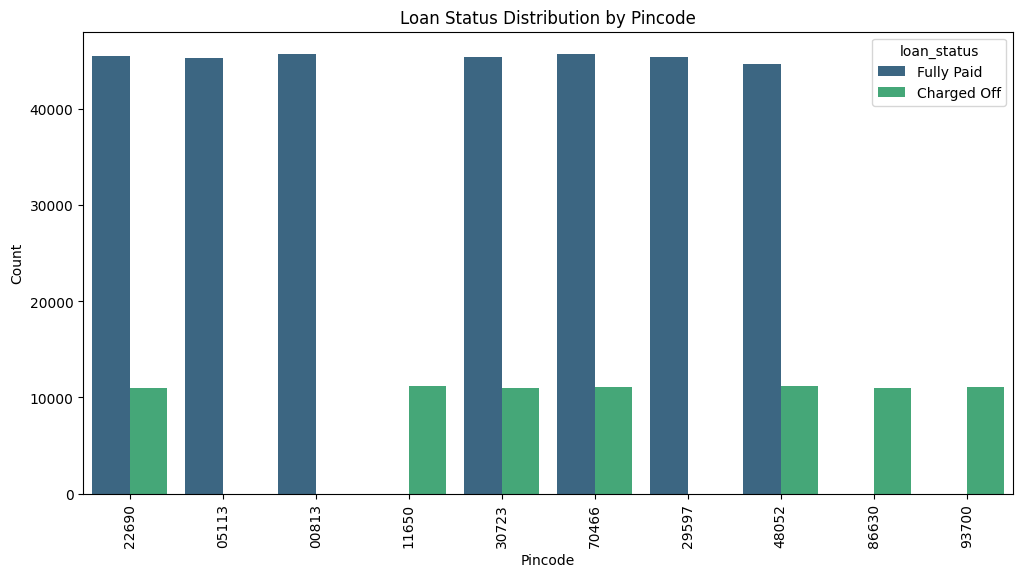

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='pincode', hue='loan_status', palette='viridis')
plt.xticks(rotation=90)
plt.title('Loan Status Distribution by Pincode')
plt.xlabel('Pincode')
plt.ylabel('Count')
plt.show()

Interesting, All the loan from the Pin code 93700,11650,86630 have been defaulter. If we want to fund people from these areas we will have to be very cautious. We will only offer pre-approved loans to the people who have been a top profile.

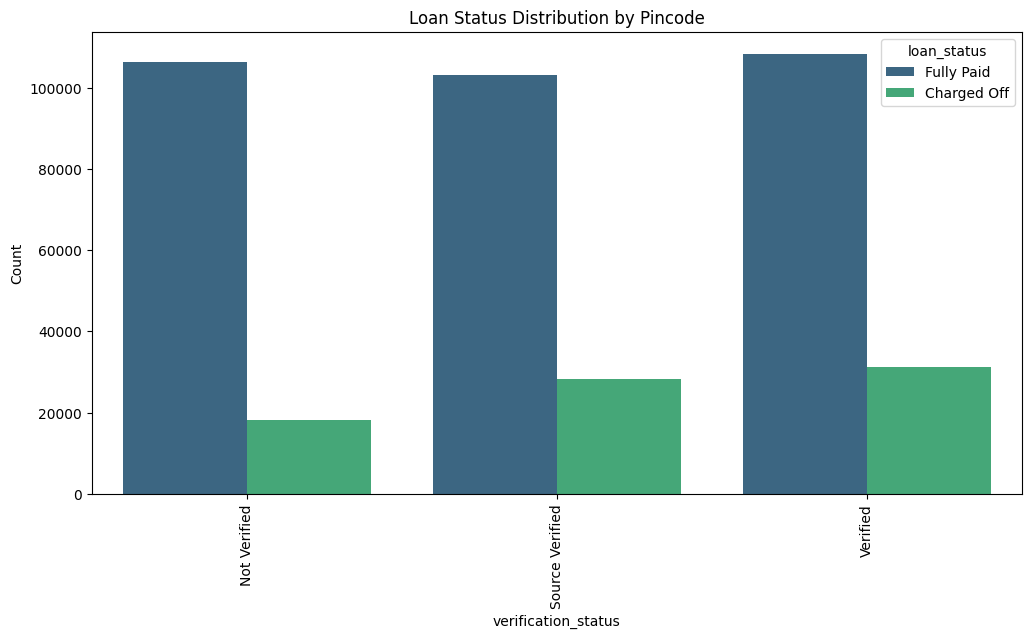

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='verification_status' ,hue='loan_status', palette='viridis')
plt.xticks(rotation=90)
plt.title('Loan Status Distribution by Pincode')
plt.xlabel('verification_status')
plt.ylabel('Count')
plt.show()

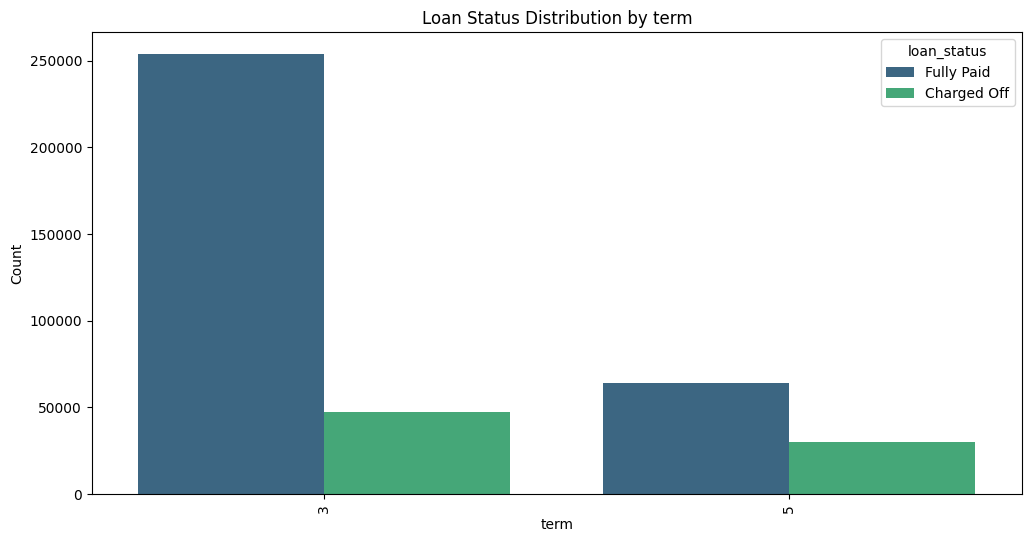

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='term', hue='loan_status', palette='viridis')
plt.xticks(rotation=90)
plt.title('Loan Status Distribution by term')
plt.xlabel('term')
plt.ylabel('Count')
plt.show()

We have a nice observation here, 20% of the total loan that were borrowed for 3 years defaulted on their payments.
Where as almost 50% of the total loan that were borrowed for 5 years defaulted on their payments.

We can conclude that the term of the loan has a significant impact on the loan status.
We will be only offering 3 years as max tenure. 5 years will only be offered if the profile is top 10% of all the clients.
Someone has to tick every box to be able to borrow the loan for 5 years.

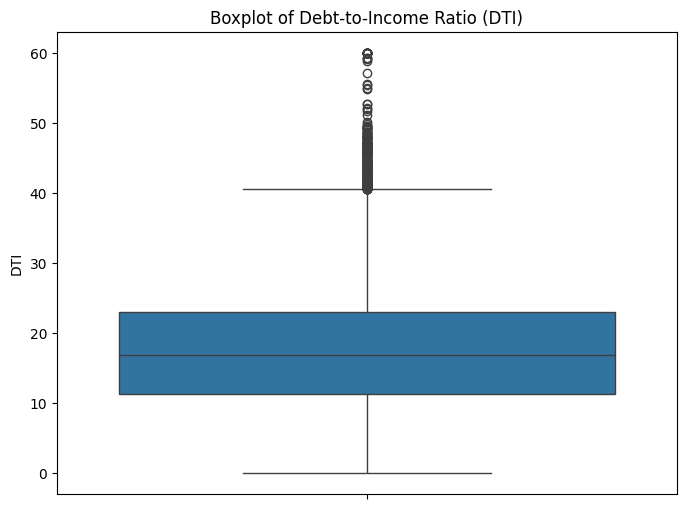

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='dti')
plt.title('Boxplot of Debt-to-Income Ratio (DTI)')
plt.ylabel('DTI')
plt.show()

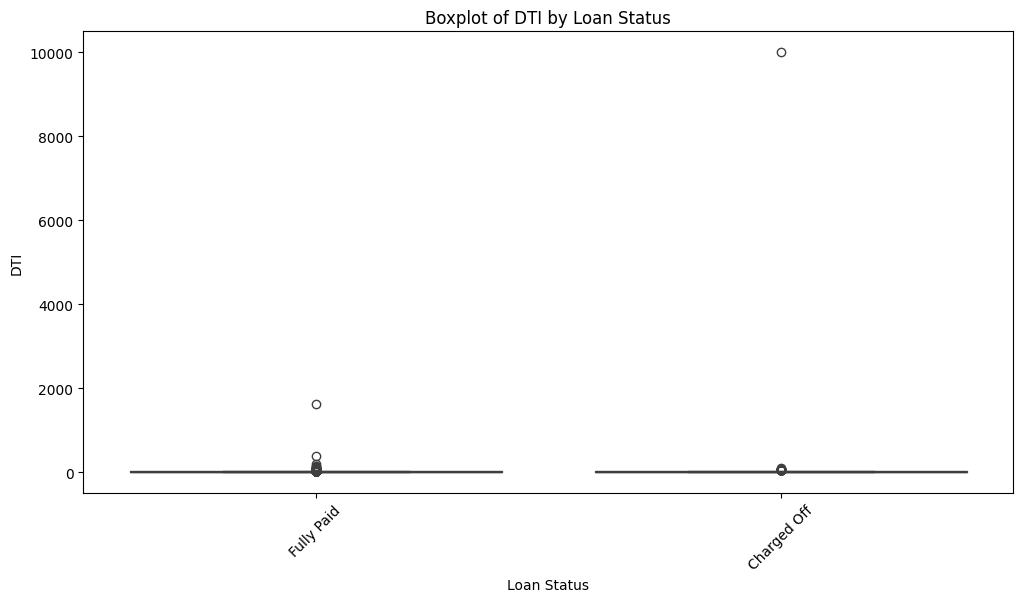

In [604]:
# Plotting a boxplot of 'dti' by 'loan_status'
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status', y='dti', data=df)
plt.title('Boxplot of DTI by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('DTI')
plt.xticks(rotation=45)
plt.show()
